In [5]:
import pandas as pd
import numpy as np
import pandas_ta as pta
import ta
# from datapackage import Package
# from selenium import webdriver
# import requests
# from bs4 import BeautifulSoup
# import yfinance as yf
import os
import random
import shutil
import time
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import array
from tensorflow.keras.utils import plot_model
import graphviz
import pydot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
ticker_code = "AVY"

features = pd.read_pickle("test_sets/" + ticker_code + "_X_train.pkl")
label = pd.read_pickle("test_sets/" + ticker_code + "_y_train.pkl")
features.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.006684,0.006840,0.006739,0.003182,0.0,0.0
1,0.000055,0.0,0.006713,0.006870,0.006768,0.001591,0.0,0.0
2,0.000110,0.0,0.006655,0.006781,0.006709,0.007501,0.0,0.0
3,0.000275,0.0,0.006567,0.006781,0.006680,0.001364,0.0,0.0
4,0.000330,0.0,0.006596,0.006781,0.006680,0.002614,0.0,0.0


In [9]:
def create_windows(test_set, steps):
	X_list = []
	function_set = test_set.copy()
	for i in range(len(test_set) - steps):
		x_slice = function_set[0:steps]
		X_list.append(x_slice)
		function_set = function_set.shift(-1)
	del(function_set)
	return(np.array(X_list))




In [49]:
steps = 5
X_list = create_windows(features, steps)

In [50]:
X_list.shape

(10035, 5, 8)

In [53]:

n_features = X_list.shape[2]
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(steps, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_list, label[:(steps * -1)], epochs=10, batch_size=32)

Epoch 1/10
314/314 [==============================] - 6s 7ms/step - loss: 121.4799
Epoch 2/10
314/314 [==============================] - 2s 7ms/step - loss: 13.4003
Epoch 3/10
314/314 [==============================] - 2s 7ms/step - loss: 4.9558
Epoch 4/10
314/314 [==============================] - 2s 7ms/step - loss: 3.4411
Epoch 5/10
314/314 [==============================] - 2s 7ms/step - loss: 2.8103
Epoch 6/10
314/314 [==============================] - 2s 7ms/step - loss: 2.4946
Epoch 7/10
314/314 [==============================] - 2s 7ms/step - loss: 2.3618
Epoch 8/10
314/314 [==============================] - 2s 7ms/step - loss: 2.3989
Epoch 9/10
314/314 [==============================] - 2s 7ms/step - loss: 2.2353
Epoch 10/10
314/314 [==============================] - 2s 7ms/step - loss: 2.1725


In [14]:
X_test = pd.read_pickle("test_sets/" + ticker_code + "_X_test.pkl")
y_test = pd.read_pickle("test_sets/" + ticker_code + "_y_test.pkl")

In [55]:
steps= 5
test = create_windows(X_test, steps)

In [56]:
a = model.evaluate(test, y_test[:(steps * -1)])

79/79 [==============================] - 1s 4ms/step - loss: 5638.1841


In [52]:
test.shape, X_list.shape

((2515, 2505, 8), (10035, 5, 8))

In [57]:
pred = model.predict(test)

79/79 [==============================] - 1s 5ms/step


In [58]:
pred

array([[28.030806],
       [28.0873  ],
       [28.158916],
       ...,
       [43.30204 ],
       [43.30216 ],
       [43.302124]], dtype=float32)

In [48]:
len(pred[0])

2505

In [162]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [195]:
dataset_train.iloc[:, 1:2]

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [167]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [170]:
X_train = []
y_train = []
for i in range(60, 2035):
	X_train.append(training_set_scaled[i-60:i, 0])
	y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [171]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [172]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 11s 61ms/step - loss: 0.0123
Epoch 2/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0036
Epoch 3/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 4s 62ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0025
Epoch 8/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 4s 59ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 4s 58ms/step - loss: 0.0018
Epoch 13/100
62/62 [====

In [173]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [176]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
	X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\BogPoet\AppData\Local\Temp\ipykernel_15008\1149199898.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


1/1 [==============================] - 1s 1s/step


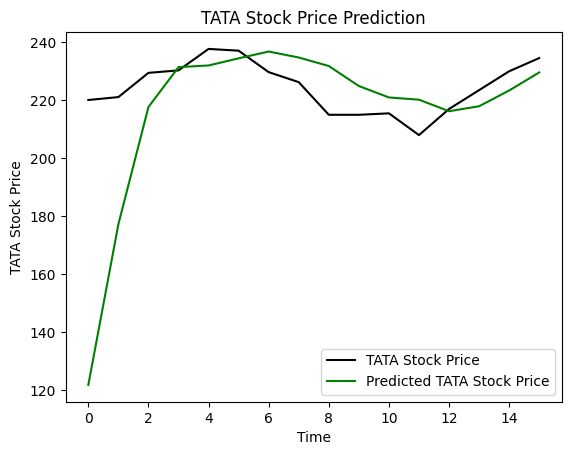

In [178]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [179]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])